In [1]:
import torch

In [4]:
def print_val(x):
    print "type :",type(x)
    print "shape : ", x.shape
    print "값 : \n", x
    print " "

In [5]:
x = torch.rand(2,3,2)
print_val(x)

x=torch.randn(2,3)
print_val(x)

type : <class 'torch.Tensor'>
shape :  torch.Size([2, 3, 2])
값 : 
tensor([[[0.8962, 0.9166],
         [0.7678, 0.0976],
         [0.8247, 0.6229]],

        [[0.1738, 0.1033],
         [0.5732, 0.8953],
         [0.0164, 0.3216]]])
 
type : <class 'torch.Tensor'>
shape :  torch.Size([2, 3])
값 : 
tensor([[ 2.1221, -1.6351,  1.2068],
        [-0.4782, -0.2352, -2.2113]])
 


In [6]:
x=torch.randperm(4)
print_val(x)

type : <class 'torch.Tensor'>
shape :  torch.Size([4])
값 : 
tensor([2, 1, 3, 0])
 


In [7]:
x=torch.arange(0,3,step=0.5)
print_val(x)

type : <class 'torch.Tensor'>
shape :  torch.Size([6])
값 : 
tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000])
 


In [8]:
print_val( torch.ones(3,4))
print_val( torch.zeros(3,4))

type : <class 'torch.Tensor'>
shape :  torch.Size([3, 4])
값 : 
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
 
type : <class 'torch.Tensor'>
shape :  torch.Size([3, 4])
값 : 
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
 


In [10]:
print_val(torch.Tensor(2,4))

type : <class 'torch.Tensor'>
shape :  torch.Size([2, 4])
값 : 
tensor([[-2.5025e+23,  4.5787e-41, -2.5025e+23,  4.5787e-41],
        [ 3.2981e+03,  3.0751e-41, -9.0048e+23,  4.5787e-41]])
 


In [15]:
print_val(torch.Tensor([2,3]) )

print_val(torch.Tensor([[2,3],[3,4]]))

type : <class 'torch.Tensor'>
shape :  torch.Size([2])
값 : 
tensor([2., 3.])
 
type : <class 'torch.Tensor'>
shape :  torch.Size([2, 2])
값 : 
tensor([[2., 3.],
        [3., 4.]])
 


In [16]:
x=torch.FloatTensor(2,3)
print_val(x)

x=x.type_as(torch.IntTensor())
print_val(x)

type : <class 'torch.Tensor'>
shape :  torch.Size([2, 3])
값 : 
tensor([[-9.1520e+23,  4.5787e-41, -9.1520e+23],
        [ 4.5787e-41, -9.1520e+23,  4.5787e-41]])
 
type : <class 'torch.Tensor'>
shape :  torch.Size([2, 3])
값 : 
tensor([[-2147483648,           0, -2147483648],
        [          0, -2147483648,           0]], dtype=torch.int32)
 


In [17]:
torch.FloatTensor(3,4,5).size()

torch.Size([3, 4, 5])

In [18]:
import numpy as np
np_x = np.ndarray((2,3),dtype = int)
print_val(np_x)

x=torch.from_numpy(np_x)
print_val(x)

type : <type 'numpy.ndarray'>
shape :  (2, 3)
값 : 
[[140341615276112 140341615276304 140341615276368]
 [140341615276432 140341615276496 140341615276560]]
 
type : <class 'torch.Tensor'>
shape :  torch.Size([2, 3])
값 : 
tensor([[140341615276112, 140341615276304, 140341615276368],
        [140341615276432, 140341615276496, 140341615276560]])
 


# MNIST 데이터로드

In [19]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 0
60000
mnist 길이: 60000
5
torch.Size([1, 28, 28])


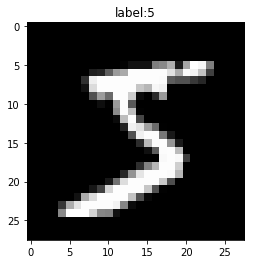

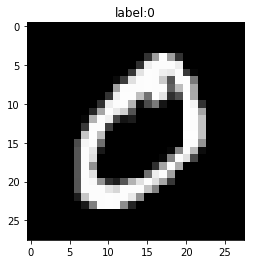

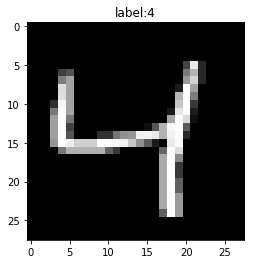

In [24]:
#mnist 로드
mnist_train = dset.MNIST("",train = True, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

#그려보기
image, label = mnist_train.__getitem__(0)
print image.size(), label

image, label = mnist_train[1]
print image.size(),label

print mnist_train.__len__()
print "mnist 길이:", len(mnist_train)

print mnist_train[0][1]
print mnist_train[0][0].size()

for i in range(3):
    img = mnist_train[i][0].numpy()
    plt.title("label:%d" %mnist_train[i][1])
    plt.imshow(img[0], cmap='gray')
    plt.show()

In [28]:
mnist_train = dset.MNIST("",train = True, transform=transforms.ToTensor(),
                        target_transform=None, download=True)
mnist_test = dset.MNIST("",train = False, transform=transforms.ToTensor(),
                        target_transform=None, download=True)

mnist_train의 길이: 60000
mnist_test의 길이: 10000
image data형태: torch.Size([1, 28, 28])
label: 5


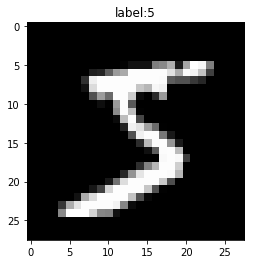

In [31]:
print "mnist_train의 길이:", len(mnist_train)
print "mnist_test의 길이:", len(mnist_test)

image, label = mnist_train.__getitem__(0)
print "image data형태:",image.size()
print "label:",label

img = image.numpy()
plt.title("label:%d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

In [32]:
batch_size =16

In [33]:
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100],batch_size=batch_size,
                                           shuffle = True, num_workers=2,
                                           drop_last=True)
test_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100],batch_size=batch_size,
                                           shuffle = False, num_workers=2,
                                           drop_last=True)

[0]
한번에 로드되는 데이터의 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


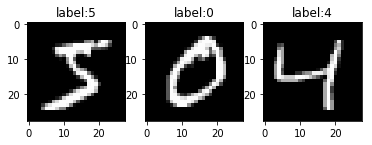

[1]
한번에 로드되는 데이터의 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


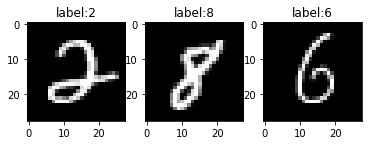

[2]
한번에 로드되는 데이터의 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


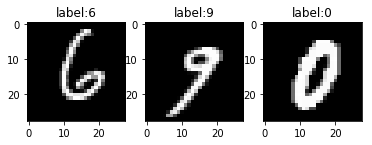

[3]
한번에 로드되는 데이터의 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


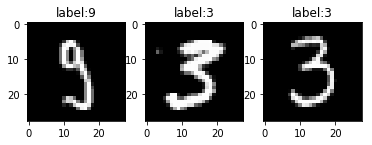

[4]
한번에 로드되는 데이터의 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


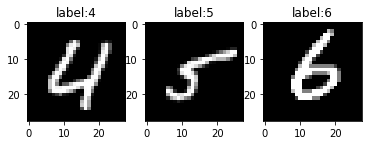

[5]
한번에 로드되는 데이터의 크기 16
torch.Size([16, 28, 28])
torch.Size([16])


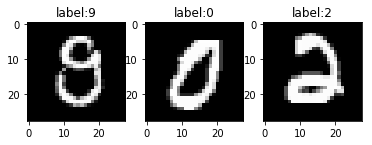

In [37]:
n=3
for i, [imgs, labels] in enumerate(test_loader):
    if i>5:
        break
    
    print "[%d]" %i
    print "한번에 로드되는 데이터의 크기", len(imgs)
    
    x=Variable(imgs)
    x=x.reshape((x.shape[0],x.shape[2], x.shape[3]))
    y_=Variable(labels)
    
    print x.shape
    print y_.shape
    
    for j in range(n):
        img = imgs[j].numpy()
        img = img.reshape((img.shape[1],img.shape[2]))
        
        plt.subplot(1,n,j+1)
        plt.imshow(img, cmap='gray')
        plt.title("label:%d" %labels[j])
    plt.show()